### Alternative Fuel Locations

* This project will focus on the density and distribution of alternative fuel locations in the extended Chicago Area.
** The data set used was obtained from the City of Chicago website, and can be accessed following the link: https://data.cityofchicago.org/Environment-Sustainable-Development/Alternative-Fuel-Locations/f7f2-ggz5/data

In [87]:
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import numpy as np

# Reading csv file and creating Data Frame
csv_file = "Alternative_Fuel_Locations.csv"
alternative_fuel_df = pd.read_csv(csv_file)

# Column names for cleaning out some 
alternative_fuel_df.columns

# Accessing columns of interest (getting rid of empty or almost empty columns)
cleandf = alternative_fuel_df[['ID', 'Fuel Type Code', 'Station Name', 'Street Address',
                               'City', 'State', 'Status Code', 'Expected Date', 
                               'Groups With Access Code', 'Access Days Time', 'EV Other Info', 'EV Network',
                               'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
                               'Date Last Confirmed', 'Owner Type Code',
                               'Federal Agency ID', 'Federal Agency Name', 'Open Date']]

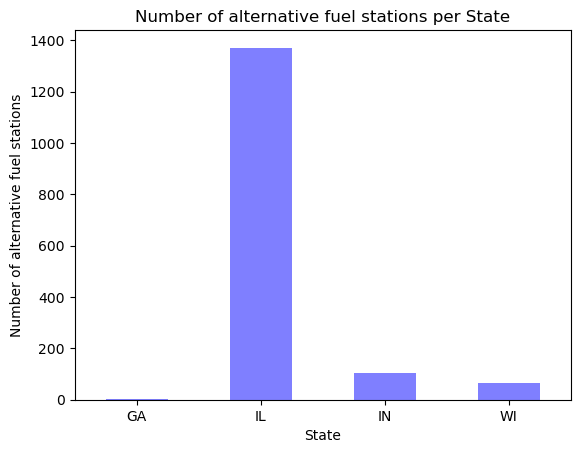

In [85]:
# Explore what cities offer the most alternative fuel options
# Obtaining the number of fuel stations by state
bystate_counts = cleandf.groupby(["State"]).count()["ID"]

# Bar plot

bystate_counts.plot.bar(color="b", alpha=0.5, align="center")
plt.title("Number of alternative fuel stations per State")
plt.xlabel("State")
plt.ylabel("Number of alternative fuel stations")
x_axis = np.arange(len(bystate_counts))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation="horizontal");

* The state with more alternative fuel stations in this dataset is Illinois. Since this list is probably not exhaustive for Indiana, Wisconsin or Georgia, we will analyze tendencies only in Illinois

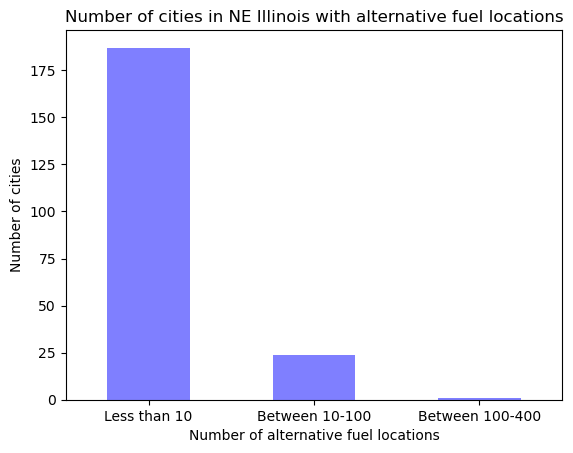

In [93]:
# Getting a Data Frame with only Illinois State information
bystatedf = cleandf.groupby("State")
illinois_df = bystatedf.get_group("IL")


# Counts of fuel location by City
bycity_counts = illinois_df.groupby(["City"]).count()["ID"]
bycity_counts.sort_values()

# Use bins to group cities by numbers of fuel stations
size_bins = [0, 10, 100, 400]
labels = ["Less than 10", "Between 10-100", "Between 100-400"]
bycity_counts_bins = pd.cut(bycity_counts, size_bins, labels = labels, include_lowest = True)
numbers_bycity = bycity_counts_bins.value_counts()

# Bar plot
numbers_bycity.plot.bar(color="b", alpha=0.5, align="center")
plt.title("Number of cities in NE Illinois with alternative fuel locations")
plt.xlabel("Number of alternative fuel locations")
plt.ylabel("Number of cities")
x_axis = np.arange(len(numbers_bycity))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation="horizontal");

ELEC    357
E85      18
LPG       5
CNG       4
Name: Fuel Type Code, dtype: int64


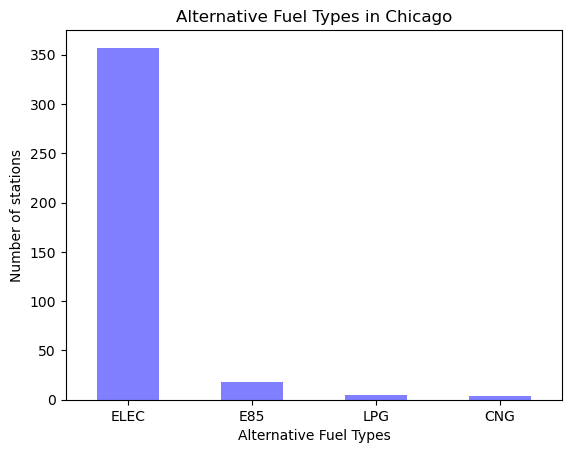

In [60]:
# How many types of alternative fuel offers Chicago?
illinois_df2 = illinois_df.groupby(["City"])

chicago_df = illinois_df2.get_group("Chicago")

altfuel_chicago = chicago_df["Fuel Type Code"].value_counts()
    
print(altfuel_chicago)

# Plot
altfuel_chicago.plot.bar(color="b", alpha=0.5, align="center")
plt.title("Alternative Fuel Types in Chicago")
plt.xlabel("Alternative Fuel Types")
plt.ylabel("Number of stations")
x_axis = np.arange(len(altfuel_chicago))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation="horizontal");

In [17]:
# How many types of alternative fuel offer that cluster of 24 cities that have between 10 - 100 fuel locations? 
# Obtaining the names of the cities in the cluster
bycity_counts_bins2 = bycity_counts.groupby(pd.cut(bycity_counts, size_bins, labels = labels, include_lowest = True))
cluster = bycity_counts_bins2.get_group("Between 10-100")

print(cluster)

City
Aurora              21
Barrington          15
Bolingbrook         28
Crystal Lake        12
DeKalb              25
Des Plaines         14
Downers Grove       15
Elgin               18
Evanston            26
Geneva              11
Great Lakes         12
Joliet              31
Lemont              11
Libertyville        21
Lombard             24
Montgomery          12
Naperville          33
North Aurora        11
Northbrook          14
Oak Brook           23
Oak Park            16
Oakbrook Terrace    18
Schaumburg          18
Skokie              13
Name: ID, dtype: int64


In [119]:
# I want to know how many times each fuel type code word appears in any city of the list above.
year_illinois_df = illinois_df.copy()
year_illinois_df = pd.to_datetime(year_illinois_df["Open Date"])

year_illinois_df.head()

0   2013-11-12
1   2020-01-10
2   2021-07-31
3   2021-11-01
4   2022-03-27
Name: Open Date, dtype: datetime64[ns]